Saving runway.png to runway.png
 Loading: runway.png
 Image loaded. Applying custom histogram equalization 


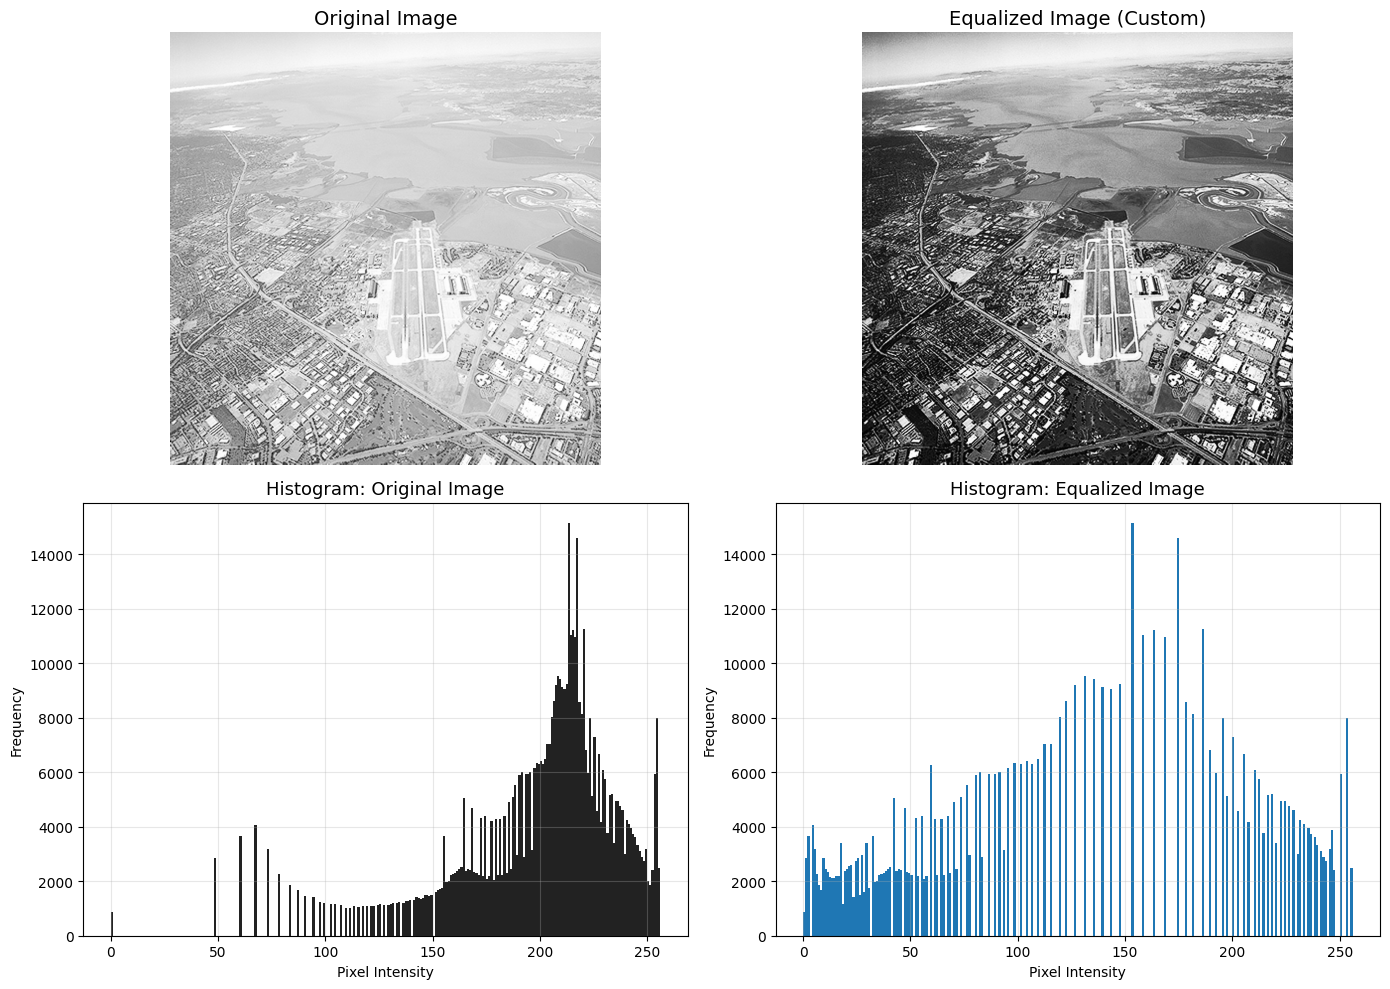

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#  Custom Histogram Equalization
def custom_hist_equalization(img):
    # Compute histogram manually
    hist = np.zeros(256, dtype=int)
    for p in img.flatten():
        hist[p] += 1

    # Compute CDF
    cdf = np.cumsum(hist)
    cdf_min = cdf[cdf > 0][0]
    lut = np.clip((cdf - cdf_min) / (img.size - cdf_min) * 255, 0, 255).astype(np.uint8)

    # Apply LUT
    eq = cv.LUT(img, lut)
    return eq, lut

# Upload Image
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

print(" Loading:", file_path)

# Load image in grayscale
img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if img is None:
    print(" ERROR: Image not found!")
else:
    print(" Image loaded. Applying custom histogram equalization ")

    # Apply custom histogram equalization
    img_eq, lut = custom_hist_equalization(img)

    #  Display Results
    plt.figure(figsize=(14, 10))

    #  Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image', fontsize=14)
    plt.axis('off')

    #  Equalized Image
    plt.subplot(2, 2, 2)
    plt.imshow(img_eq, cmap='gray')
    plt.title('Equalized Image (Custom)', fontsize=14)
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 2, 3)
    plt.hist(img.flatten(), bins=256, range=[0,256], color='#222222')
    plt.title('Histogram: Original Image', fontsize=13)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    #  Equalized Histogram
    plt.subplot(2, 2, 4)
    plt.hist(img_eq.flatten(), bins=256, range=[0,256], color='#1f77b4')
    plt.title('Histogram: Equalized Image', fontsize=13)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

